In [1006]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

### 1. Date and Time Data Types and Tools

In [1007]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2021, 7, 12, 1, 6, 2, 636818)

In [1008]:
now.year, now.month, now.day

(2021, 7, 12)

In [1009]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [1010]:
delta

datetime.timedelta(days=926, seconds=56700)

In [1011]:
delta.days

926

In [1012]:
delta.seconds

56700

In [1013]:
[i for i in dir(delta) if not i.startswith("_")]

['days',
 'max',
 'microseconds',
 'min',
 'resolution',
 'seconds',
 'total_seconds']

In [1014]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start

datetime.datetime(2011, 1, 7, 0, 0)

In [1015]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [1016]:
timedelta(12)

datetime.timedelta(days=12)

In [1017]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [1018]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### 2. Converting Between String and Datetime

In [1019]:
stamp = datetime(2011, 1, 3)
stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [1020]:
str(stamp)

'2011-01-03 00:00:00'

In [1021]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [1022]:
value = '2011-01-03'
value

'2011-01-03'

In [1023]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [1024]:
value_2= datetime.strptime(value, '%Y-%m-%d')
value_2

datetime.datetime(2011, 1, 3, 0, 0)

In [1025]:
type(value), type(value_2)

(str, datetime.datetime)

In [1026]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [1027]:
from dateutil.parser import parse
parsed_date = parse('2011-01-03')
parsed_date

datetime.datetime(2011, 1, 3, 0, 0)

In [1028]:
type(parsed_date)

datetime.datetime

In [1029]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [1030]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [1031]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [1032]:
[type(i) for i in datestrs]

[str, str]

In [1033]:
[type(i) for i in pd.to_datetime(datestrs)]

[pandas._libs.tslibs.timestamps.Timestamp,
 pandas._libs.tslibs.timestamps.Timestamp]

In [1034]:
idx = pd.to_datetime(datestrs + [None])

In [1035]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [1036]:
idx[2]

NaT

In [1037]:
pd.isnull(idx)

array([False, False,  True])

### 3. Time Series Basics

In [1038]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [1039]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [1040]:
ts[::2]

2011-01-02   -0.204708
2011-01-07   -0.519439
2011-01-10    1.965781
dtype: float64

In [1041]:
ts + ts[::2]

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

In [1042]:
ts.index.dtype

dtype('<M8[ns]')

In [1043]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

In [1044]:
ts + ts[::4]

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07         NaN
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

### 4. Indexing, Selection, Subsetting

In [1045]:
stamp = ts.index[2]
ts[stamp]

-0.5194387150567381

In [1046]:
ts['1/10/2011']

1.9657805725027142

In [1047]:
ts['20110110']

1.9657805725027142

In [1048]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))

In [1049]:
longer_ts

2000-01-01    0.092908
2000-01-02    0.281746
2000-01-03    0.769023
2000-01-04    1.246435
2000-01-05    1.007189
                ...   
2002-09-22    0.930944
2002-09-23   -0.811676
2002-09-24   -1.830156
2002-09-25   -0.138730
2002-09-26    0.334088
Freq: D, Length: 1000, dtype: float64

In [1050]:
longer_ts['2001']

2001-01-01    1.599534
2001-01-02    0.474071
2001-01-03    0.151326
2001-01-04   -0.542173
2001-01-05   -0.475496
                ...   
2001-12-27    0.057874
2001-12-28   -0.433739
2001-12-29    0.092698
2001-12-30   -1.397820
2001-12-31    1.457823
Freq: D, Length: 365, dtype: float64

In [1051]:
longer_ts['2000']

2000-01-01    0.092908
2000-01-02    0.281746
2000-01-03    0.769023
2000-01-04    1.246435
2000-01-05    1.007189
                ...   
2000-12-27   -1.026621
2000-12-28    1.241573
2000-12-29   -0.156760
2000-12-30   -2.449096
2000-12-31   -1.033948
Freq: D, Length: 366, dtype: float64

In [1052]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [1053]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [1054]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [1055]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [1056]:
len(ts)

6

In [1057]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

In [1058]:
ts.truncate(before='1/9/2011')

2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [1059]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [1060]:
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,0.488675,-0.178098,2.122315,0.061192
2000-01-12,0.884111,-0.608506,-0.072052,0.544066
2000-01-19,0.323886,-1.683325,0.526860,1.858791
2000-01-26,-0.548419,-0.279397,-0.021299,-0.287990
2000-02-02,0.089175,0.522858,0.572796,-1.760372
...,...,...,...,...
2001-10-31,-0.054630,-0.656506,-1.550087,-0.044347
2001-11-07,0.681470,-0.953726,-1.857016,0.449495
2001-11-14,-0.061732,1.233914,0.705830,-1.309077
2001-11-21,-1.537380,0.531551,2.047573,0.446691


In [1061]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.006045,0.490094,-0.277186,-0.707213
2001-05-09,-0.560107,2.735527,0.927335,1.513906
2001-05-16,0.538600,1.273768,0.667876,-0.969206
2001-05-23,1.676091,-0.817649,0.050188,1.951312
2001-05-30,3.260383,0.963301,1.201206,-1.852001


### 5. Time Series with Duplicate Indices

In [1062]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dates.tolist()

[Timestamp('2000-01-01 00:00:00'),
 Timestamp('2000-01-02 00:00:00'),
 Timestamp('2000-01-02 00:00:00'),
 Timestamp('2000-01-02 00:00:00'),
 Timestamp('2000-01-03 00:00:00')]

In [1063]:
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [1064]:
dup_ts.index.is_unique

False

In [1065]:
dup_ts['1/3/2000'] 

4

In [1066]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [1067]:
grouped = dup_ts.groupby(level=0)

In [1068]:
pd.DataFrame(grouped)

,0,1
0,2000-01-01,2000-01-01 0 dtype: int32
1,2000-01-02,2000-01-02 1 2000-01-02 2 2000-01-02 ...
2,2000-01-03,2000-01-03 4 dtype: int32


In [1069]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [1070]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

### 6. Date Ranges, Frequencies, and Shifting

In [1071]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [1072]:
resampler = ts.resample('D')
pd.DataFrame(resampler)

,0,1
0,2011-01-02,2011-01-02 -0.204708 dtype: float64
1,2011-01-03,"Series([], dtype: float64)"
2,2011-01-04,"Series([], dtype: float64)"
3,2011-01-05,2011-01-05 0.478943 dtype: float64
4,2011-01-06,"Series([], dtype: float64)"
5,2011-01-07,2011-01-07 -0.519439 dtype: float64
6,2011-01-08,2011-01-08 -0.55573 dtype: float64
7,2011-01-09,"Series([], dtype: float64)"
8,2011-01-10,2011-01-10 1.965781 dtype: float64
9,2011-01-11,"Series([], dtype: float64)"


### 7. Generating Date Ranges

In [1073]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [1074]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [1075]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [1076]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [1077]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [1078]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [1079]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=False)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

### 8. Frequencies and Date Offsets


In [1080]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [1081]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [1082]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [1083]:
Hour(2) + Minute(30)

<150 * Minutes>

In [1084]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [1085]:
Hour(12) + Minute(320)

<1040 * Minutes>

In [1086]:
Hour(1) + Minute(30)

<90 * Minutes>

### 9. Week of month dates

In [1087]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### 10. Shifting (Leading and Lagging) Data

In [1088]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [1089]:
ts

2000-01-31   -0.066748
2000-02-29    0.838639
2000-03-31   -0.117388
2000-04-30   -0.517795
Freq: M, dtype: float64

In [1090]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.066748
2000-04-30    0.838639
Freq: M, dtype: float64

In [1091]:
ts.shift(-2)

2000-01-31   -0.117388
2000-02-29   -0.517795
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [1092]:
ts

2000-01-31   -0.066748
2000-02-29    0.838639
2000-03-31   -0.117388
2000-04-30   -0.517795
Freq: M, dtype: float64

In [1093]:
ts.shift(2, freq='M')

2000-03-31   -0.066748
2000-04-30    0.838639
2000-05-31   -0.117388
2000-06-30   -0.517795
Freq: M, dtype: float64

In [1094]:
ts.shift(3, freq='M')

2000-04-30   -0.066748
2000-05-31    0.838639
2000-06-30   -0.117388
2000-07-31   -0.517795
Freq: M, dtype: float64

In [1095]:
ts.shift(13, freq='M')

2001-02-28   -0.066748
2001-03-31    0.838639
2001-04-30   -0.117388
2001-05-31   -0.517795
Freq: M, dtype: float64

In [1096]:
ts.shift(3, freq='D')

2000-02-03   -0.066748
2000-03-03    0.838639
2000-04-03   -0.117388
2000-05-03   -0.517795
dtype: float64

In [1097]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00   -0.066748
2000-02-29 01:30:00    0.838639
2000-03-31 01:30:00   -0.117388
2000-04-30 01:30:00   -0.517795
Freq: M, dtype: float64

### 11. Shifting dates with offsets

In [1098]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 4, 17)

In [1099]:
now + 3 * Day()

Timestamp('2011-04-20 00:00:00')

In [1100]:
now + MonthEnd()

Timestamp('2011-04-30 00:00:00')

In [1101]:
now + MonthEnd(2)

Timestamp('2011-05-31 00:00:00')

In [1102]:
offset = MonthEnd()

In [1103]:
offset

<MonthEnd>

In [1104]:
offset.rollforward(now)

Timestamp('2011-04-30 00:00:00')

In [1105]:
offset.rollback(now)

Timestamp('2011-03-31 00:00:00')

In [1106]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [1107]:
ts

2000-01-15   -0.116696
2000-01-19    2.389645
2000-01-23   -0.932454
2000-01-27   -0.229331
2000-01-31   -1.140330
2000-02-04    0.439920
2000-02-08   -0.823758
2000-02-12   -0.520930
2000-02-16    0.350282
2000-02-20    0.204395
2000-02-24    0.133445
2000-02-28    0.327905
2000-03-03    0.072153
2000-03-07    0.131678
2000-03-11   -1.297459
2000-03-15    0.997747
2000-03-19    0.870955
2000-03-23   -0.991253
2000-03-27    0.151699
2000-03-31    1.266151
Freq: 4D, dtype: float64

In [1108]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
dtype: float64

In [1109]:
ts.resample('M').mean()

2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
Freq: M, dtype: float64

### 12. Time Zone Handling

In [1110]:
import pytz
pytz.common_timezones[-6:]

['US/Central', 'US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [1111]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### 13. Time Zone Localization and Conversion

In [1112]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.202469
2012-03-10 09:30:00    0.050718
2012-03-11 09:30:00    0.639869
2012-03-12 09:30:00    0.597594
2012-03-13 09:30:00   -0.797246
2012-03-14 09:30:00    0.472879
Freq: D, dtype: float64

In [1113]:
print(ts.index)

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00'],
              dtype='datetime64[ns]', freq='D')


In [1114]:
[i.tz for i in ts.index.tolist()]

[None, None, None, None, None, None]

In [1115]:
print(ts.index.tz)

None


In [1116]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [1117]:
this_ts = pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

In [1118]:
type(this_ts)

pandas.core.indexes.datetimes.DatetimeIndex

In [1119]:
print(this_ts)

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')


In [1120]:
this_ts.tz

<UTC>

In [1121]:
ts
ts_utc = ts.tz_localize('UTC')

In [1122]:
ts

2012-03-09 09:30:00   -0.202469
2012-03-10 09:30:00    0.050718
2012-03-11 09:30:00    0.639869
2012-03-12 09:30:00    0.597594
2012-03-13 09:30:00   -0.797246
2012-03-14 09:30:00    0.472879
Freq: D, dtype: float64

In [1123]:
ts_utc

2012-03-09 09:30:00+00:00   -0.202469
2012-03-10 09:30:00+00:00    0.050718
2012-03-11 09:30:00+00:00    0.639869
2012-03-12 09:30:00+00:00    0.597594
2012-03-13 09:30:00+00:00   -0.797246
2012-03-14 09:30:00+00:00    0.472879
Freq: D, dtype: float64

In [1124]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [1125]:
ts_utc.index.tz

<UTC>

In [1126]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.202469
2012-03-10 04:30:00-05:00    0.050718
2012-03-11 05:30:00-04:00    0.639869
2012-03-12 05:30:00-04:00    0.597594
2012-03-13 05:30:00-04:00   -0.797246
2012-03-14 05:30:00-04:00    0.472879
Freq: D, dtype: float64

In [1127]:
ts_eastern = ts.tz_localize('America/New_York')

In [1128]:
ts_eastern

2012-03-09 09:30:00-05:00   -0.202469
2012-03-10 09:30:00-05:00    0.050718
2012-03-11 09:30:00-04:00    0.639869
2012-03-12 09:30:00-04:00    0.597594
2012-03-13 09:30:00-04:00   -0.797246
2012-03-14 09:30:00-04:00    0.472879
Freq: D, dtype: float64

In [1129]:
ts_eastern_to_UTC = ts_eastern.tz_convert('UTC')
ts_eastern_to_UTC

2012-03-09 14:30:00+00:00   -0.202469
2012-03-10 14:30:00+00:00    0.050718
2012-03-11 13:30:00+00:00    0.639869
2012-03-12 13:30:00+00:00    0.597594
2012-03-13 13:30:00+00:00   -0.797246
2012-03-14 13:30:00+00:00    0.472879
Freq: D, dtype: float64

In [1130]:
ts_Berlin = ts_eastern.tz_convert('Europe/Berlin')
ts_Berlin

2012-03-09 15:30:00+01:00   -0.202469
2012-03-10 15:30:00+01:00    0.050718
2012-03-11 14:30:00+01:00    0.639869
2012-03-12 14:30:00+01:00    0.597594
2012-03-13 14:30:00+01:00   -0.797246
2012-03-14 14:30:00+01:00    0.472879
Freq: D, dtype: float64

In [1131]:
ts_shanghai = ts.index.tz_localize('Asia/Shanghai')
ts_shanghai.tz

<DstTzInfo 'Asia/Shanghai' LMT+8:06:00 STD>

### 14 Operations with Time Zone−Aware Timestamp Objects

In [1132]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp

Timestamp('2011-03-12 04:00:00')

In [1133]:
stamp_utc = stamp.tz_localize('utc')
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [1134]:
stamp_NY = stamp_utc.tz_convert('America/New_York')
stamp_NY

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [1135]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [1136]:
stamp_utc.value

1299902400000000000

In [1137]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [1138]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')

In [1139]:
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [1140]:
stamp + Hour(1)

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [1141]:
stamp + Hour(3)

Timestamp('2012-03-12 04:30:00-0400', tz='US/Eastern')

### 15. Operations Between Different Time Zones

In [1142]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0.522356
2012-03-08 09:30:00   -0.546348
2012-03-09 09:30:00   -0.733537
2012-03-12 09:30:00    1.302736
2012-03-13 09:30:00    0.022199
2012-03-14 09:30:00    0.364287
2012-03-15 09:30:00   -0.922839
2012-03-16 09:30:00    0.312656
2012-03-19 09:30:00   -1.128497
2012-03-20 09:30:00   -0.333488
Freq: B, dtype: float64

In [1143]:
ts1 = ts[:7].tz_localize('Europe/London')
ts1

2012-03-07 09:30:00+00:00    0.522356
2012-03-08 09:30:00+00:00   -0.546348
2012-03-09 09:30:00+00:00   -0.733537
2012-03-12 09:30:00+00:00    1.302736
2012-03-13 09:30:00+00:00    0.022199
2012-03-14 09:30:00+00:00    0.364287
2012-03-15 09:30:00+00:00   -0.922839
Freq: B, dtype: float64

In [1144]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')
ts2

2012-03-09 13:30:00+04:00   -0.733537
2012-03-12 13:30:00+04:00    1.302736
2012-03-13 13:30:00+04:00    0.022199
2012-03-14 13:30:00+04:00    0.364287
2012-03-15 13:30:00+04:00   -0.922839
Freq: B, dtype: float64

In [1145]:
result = ts1 + ts2
result.index

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

### 16. Periods and Period Arithmetic

In [1146]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [1147]:
p + 5

Period('2012', 'A-DEC')

In [1148]:
p - 2

Period('2005', 'A-DEC')

In [1149]:
pd.Period('2014', freq='A-DEC')

Period('2014', 'A-DEC')

In [1150]:
p

Period('2007', 'A-DEC')

In [1151]:
pd.Period('2014', freq='A-DEC') - p 

<7 * YearEnds: month=12>

In [1152]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [1153]:
rng2 = pd.period_range('2000-01-01', '2000-01-30', freq='2D')
rng2

PeriodIndex(['2000-01-01', '2000-01-03', '2000-01-05', '2000-01-07',
             '2000-01-09', '2000-01-11', '2000-01-13', '2000-01-15',
             '2000-01-17', '2000-01-19', '2000-01-21', '2000-01-23',
             '2000-01-25', '2000-01-27', '2000-01-29'],
            dtype='period[2D]', freq='2D')

In [1154]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.514551
2000-02   -0.559782
2000-03   -0.783408
2000-04   -1.797685
2000-05   -0.172670
2000-06    0.680215
Freq: M, dtype: float64

In [1155]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### 17. Period Frequency Conversion

In [1156]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [1157]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [1158]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [1159]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [1160]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [1161]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [1162]:
p = pd.Period('Aug-2007', 'M')
p

Period('2007-08', 'M')

In [1163]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [1164]:
p.asfreq('A-MAR')

Period('2008', 'A-MAR')

In [1165]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    1.607578
2007    0.200381
2008   -0.834068
2009   -0.302988
Freq: A-DEC, dtype: float64

In [1166]:
ts.asfreq('M', how='start')

2006-01    1.607578
2007-01    0.200381
2008-01   -0.834068
2009-01   -0.302988
Freq: M, dtype: float64

In [1167]:
ts.asfreq('M', how='end')

2006-12    1.607578
2007-12    0.200381
2008-12   -0.834068
2009-12   -0.302988
Freq: M, dtype: float64

In [1168]:
ts.asfreq('B', how='end')

2006-12-29    1.607578
2007-12-31    0.200381
2008-12-31   -0.834068
2009-12-31   -0.302988
Freq: B, dtype: float64

### 18. Quarterly Period Frequencies

In [1169]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [1170]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [1171]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [1172]:
p4pm = (p.asfreq('B', 'e') - 1)
p4pm

Period('2012-01-30', 'B')

In [1173]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's')
p4pm

Period('2012-01-30 00:00', 'T')

In [1174]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [1175]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 125 * 60
p4pm

Period('2012-02-04 05:00', 'T')

In [1176]:
p4pm.to_timestamp()

Timestamp('2012-02-04 05:00:00')

In [1177]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [1178]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
new_rng.tolist()

[Period('2010-10-28 16:00', 'T'),
 Period('2011-01-28 16:00', 'T'),
 Period('2011-04-28 16:00', 'T'),
 Period('2011-07-28 16:00', 'T'),
 Period('2011-10-28 16:00', 'T'),
 Period('2012-01-30 16:00', 'T')]

In [1179]:
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### 19. Converting Timestamps to Periods (and Back)

In [1180]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
rng.tolist()

[Timestamp('2000-01-31 00:00:00', freq='M'),
 Timestamp('2000-02-29 00:00:00', freq='M'),
 Timestamp('2000-03-31 00:00:00', freq='M')]

In [1181]:
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31    1.663261
2000-02-29   -0.996206
2000-03-31    1.521760
Freq: M, dtype: float64

In [1182]:
pts = ts.to_period()
pts

2000-01    1.663261
2000-02   -0.996206
2000-03    1.521760
Freq: M, dtype: float64

In [1183]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
rng.tolist()

[Timestamp('2000-01-29 00:00:00', freq='D'),
 Timestamp('2000-01-30 00:00:00', freq='D'),
 Timestamp('2000-01-31 00:00:00', freq='D'),
 Timestamp('2000-02-01 00:00:00', freq='D'),
 Timestamp('2000-02-02 00:00:00', freq='D'),
 Timestamp('2000-02-03 00:00:00', freq='D')]

In [1184]:
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    0.244175
2000-01-30    0.423331
2000-01-31   -0.654040
2000-02-01    2.089154
2000-02-02   -0.060220
2000-02-03   -0.167933
Freq: D, dtype: float64

In [1185]:
ts2.to_period('M')

2000-01    0.244175
2000-01    0.423331
2000-01   -0.654040
2000-02    2.089154
2000-02   -0.060220
2000-02   -0.167933
Freq: M, dtype: float64

In [1186]:
ts2.to_period('Y')

2000    0.244175
2000    0.423331
2000   -0.654040
2000    2.089154
2000   -0.060220
2000   -0.167933
Freq: A-DEC, dtype: float64

In [1187]:
pts = ts2.to_period()
pts

2000-01-29    0.244175
2000-01-30    0.423331
2000-01-31   -0.654040
2000-02-01    2.089154
2000-02-02   -0.060220
2000-02-03   -0.167933
Freq: D, dtype: float64

In [1188]:
pts.to_timestamp(how='start')

2000-01-29    0.244175
2000-01-30    0.423331
2000-01-31   -0.654040
2000-02-01    2.089154
2000-02-02   -0.060220
2000-02-03   -0.167933
Freq: D, dtype: float64

In [1189]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    0.244175
2000-01-30 23:59:59.999999999    0.423331
2000-01-31 23:59:59.999999999   -0.654040
2000-02-01 23:59:59.999999999    2.089154
2000-02-02 23:59:59.999999999   -0.060220
2000-02-03 23:59:59.999999999   -0.167933
Freq: D, dtype: float64

### 20. Creating a PeriodIndex from Arrays

In [1190]:
data = pd.read_csv('examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [1191]:
data.year.head()

0    1959.0
1    1959.0
2    1959.0
3    1959.0
4    1960.0
Name: year, dtype: float64

In [1192]:
data.quarter.head()

0    1.0
1    2.0
2    3.0
3    4.0
4    1.0
Name: quarter, dtype: float64

In [1193]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
index.tolist()[::100]

[Period('1959Q1', 'Q-DEC'),
 Period('1984Q1', 'Q-DEC'),
 Period('2009Q1', 'Q-DEC')]

In [1194]:
data.index = index
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [1195]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

### 21. Resampling and Frequency Conversion

In [1196]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
rng[::100]

DatetimeIndex(['2000-01-01'], dtype='datetime64[ns]', freq='100D')

In [1197]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    0.631634
2000-01-02   -1.594313
2000-01-03   -1.519937
2000-01-04    1.108752
2000-01-05    1.255853
                ...   
2000-04-05   -0.423776
2000-04-06    0.789740
2000-04-07    0.937568
2000-04-08   -2.253294
2000-04-09   -1.772919
Freq: D, Length: 100, dtype: float64

In [1198]:
ts.resample('M').mean()

2000-01-31   -0.165893
2000-02-29    0.078606
2000-03-31    0.223811
2000-04-30   -0.063643
Freq: M, dtype: float64

In [1199]:
ts.resample('M', kind = 'period').mean()

2000-01   -0.165893
2000-02    0.078606
2000-03    0.223811
2000-04   -0.063643
Freq: M, dtype: float64

In [1200]:
ts.resample('M').mean()

2000-01-31   -0.165893
2000-02-29    0.078606
2000-03-31    0.223811
2000-04-30   -0.063643
Freq: M, dtype: float64

In [1201]:
this_groupby = ts.resample('M', kind = 'period').mean()
len(this_groupby)

4

### 22. Downsampling

In [1202]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [1203]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [1204]:
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [1205]:
#why 21, 35 and 10

In [1206]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [1207]:
ts.resample('5min', closed='left', label='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [1208]:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [1209]:
ts.resample('5min', closed='right',
            label='right', loffset='7s').sum()

2000-01-01 00:00:07     0
2000-01-01 00:05:07    15
2000-01-01 00:10:07    40
2000-01-01 00:15:07    11
Freq: 5T, dtype: int32

### 23. Open-High-Low-Close (OHLC) resampling

In [1210]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### 24. Upsampling and Interpolation

In [1211]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [1212]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [1213]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,-0.896431,0.677263,0.036503,0.087102
2000-01-07,-0.896431,0.677263,0.036503,0.087102
2000-01-08,-0.896431,0.677263,0.036503,0.087102
2000-01-09,-0.896431,0.677263,0.036503,0.087102
2000-01-10,-0.896431,0.677263,0.036503,0.087102
2000-01-11,-0.896431,0.677263,0.036503,0.087102
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [1214]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,-0.896431,0.677263,0.036503,0.087102
2000-01-07,-0.896431,0.677263,0.036503,0.087102
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [1215]:
frame.resample('D').bfill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,-0.046662,0.927238,0.482284,-0.867130
2000-01-07,-0.046662,0.927238,0.482284,-0.867130
2000-01-08,-0.046662,0.927238,0.482284,-0.867130
2000-01-09,-0.046662,0.927238,0.482284,-0.867130
2000-01-10,-0.046662,0.927238,0.482284,-0.867130
2000-01-11,-0.046662,0.927238,0.482284,-0.867130
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [1216]:
frame.resample('D').bfill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,-0.046662,0.927238,0.482284,-0.867130
2000-01-11,-0.046662,0.927238,0.482284,-0.867130
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [1217]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.896431,0.677263,0.036503,0.087102
2000-01-13,-0.046662,0.927238,0.482284,-0.867130


### 25. Resampling with Periods

In [1218]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]


,Colorado,Texas,New York,Ohio
2000-01,0.493841,-0.155434,1.397286,1.507055
2000-02,-1.179442,0.443171,1.395676,-0.529658
2000-03,0.787358,0.248845,0.743239,1.267746
2000-04,1.302395,-0.272154,-0.051532,-0.467740
2000-05,-1.040816,0.426419,0.312945,-1.115689


In [1219]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.556703,0.016631,0.111873,-0.027445
2001,0.046303,0.163344,0.251503,-0.157276


In [1220]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.556703,0.016631,0.111873,-0.027445
2000Q2,0.556703,0.016631,0.111873,-0.027445
2000Q3,0.556703,0.016631,0.111873,-0.027445
2000Q4,0.556703,0.016631,0.111873,-0.027445
2001Q1,0.046303,0.163344,0.251503,-0.157276
2001Q2,0.046303,0.163344,0.251503,-0.157276
2001Q3,0.046303,0.163344,0.251503,-0.157276
2001Q4,0.046303,0.163344,0.251503,-0.157276


In [1221]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.556703,0.016631,0.111873,-0.027445
2001Q1,0.556703,0.016631,0.111873,-0.027445
2001Q2,0.556703,0.016631,0.111873,-0.027445
2001Q3,0.556703,0.016631,0.111873,-0.027445
2001Q4,0.046303,0.163344,0.251503,-0.157276


In [1222]:
annual_frame.resample('Q-DEC', convention='start').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.556703,0.016631,0.111873,-0.027445
2000Q2,0.556703,0.016631,0.111873,-0.027445
2000Q3,0.556703,0.016631,0.111873,-0.027445
2000Q4,0.556703,0.016631,0.111873,-0.027445
2001Q1,0.046303,0.163344,0.251503,-0.157276
2001Q2,0.046303,0.163344,0.251503,-0.157276
2001Q3,0.046303,0.163344,0.251503,-0.157276
2001Q4,0.046303,0.163344,0.251503,-0.157276


In [1223]:
annual_frame.resample('Q-MAR').ffill() #should this stop at 2001 March? why 2002 Mar? 

,Colorado,Texas,New York,Ohio
2000Q4,0.556703,0.016631,0.111873,-0.027445
2001Q1,0.556703,0.016631,0.111873,-0.027445
2001Q2,0.556703,0.016631,0.111873,-0.027445
2001Q3,0.556703,0.016631,0.111873,-0.027445
2001Q4,0.046303,0.163344,0.251503,-0.157276
2002Q1,0.046303,0.163344,0.251503,-0.157276
2002Q2,0.046303,0.163344,0.251503,-0.157276
2002Q3,0.046303,0.163344,0.251503,-0.157276


### 26. Moving Window Functions

In [1224]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


In [1225]:
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


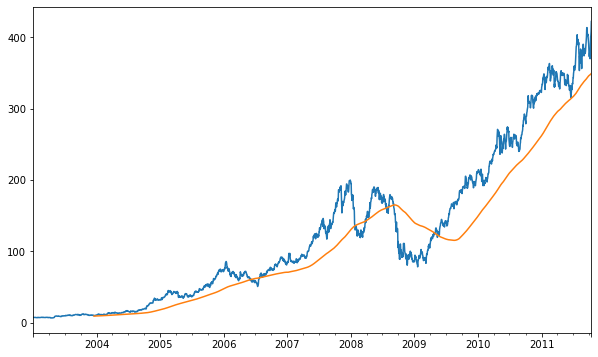

In [1226]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [1227]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [1228]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

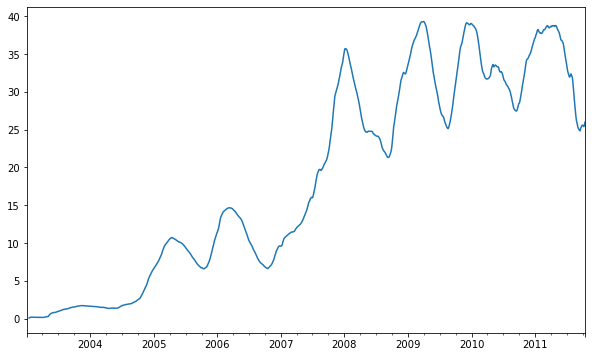

In [1229]:
appl_std250.plot()

In [1230]:
expanding_mean = appl_std250.expanding().mean()
expanding_mean

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    18.521201
2011-10-11    18.524272
2011-10-12    18.527385
2011-10-13    18.530554
2011-10-14    18.533823
Freq: B, Name: AAPL, Length: 2292, dtype: float64

In [1231]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

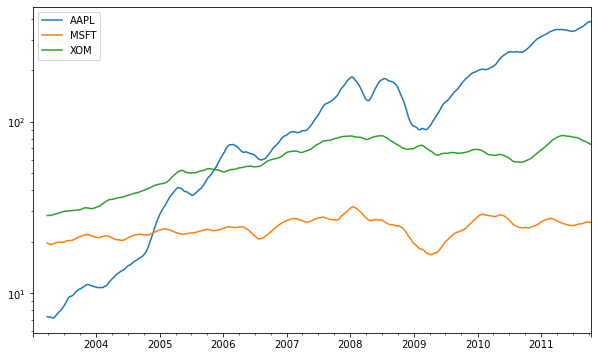

In [1232]:
close_px.rolling(60).mean().plot(logy=True) #log scale y axis

In [1233]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


In [1234]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### 27. Exponentially Weighted Functions

In [1235]:
plt.figure()

aapl_px = close_px.AAPL['2006':'2007']
aapl_px

2006-01-02     71.89
2006-01-03     74.75
2006-01-04     74.97
2006-01-05     74.38
2006-01-06     76.30
               ...  
2007-12-25    198.80
2007-12-26    198.95
2007-12-27    198.57
2007-12-28    199.83
2007-12-31    198.08
Freq: B, Name: AAPL, Length: 521, dtype: float64

<Figure size 720x432 with 0 Axes>

In [1236]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ma60

2006-01-02           NaN
2006-01-03           NaN
2006-01-04           NaN
2006-01-05           NaN
2006-01-06           NaN
                 ...    
2007-12-25    181.520333
2007-12-26    182.615000
2007-12-27    183.757333
2007-12-28    184.872000
2007-12-31    186.009667
Freq: B, Name: AAPL, Length: 521, dtype: float64

In [1237]:
ewma60 = aapl_px.ewm(span=30).mean()
ewma60

2006-01-02     71.890000
2006-01-03     73.367667
2006-01-04     73.937767
2006-01-05     74.059619
2006-01-06     74.569360
                 ...    
2007-12-25    184.441771
2007-12-26    185.377786
2007-12-27    186.228897
2007-12-28    187.106387
2007-12-31    187.814362
Freq: B, Name: AAPL, Length: 521, dtype: float64

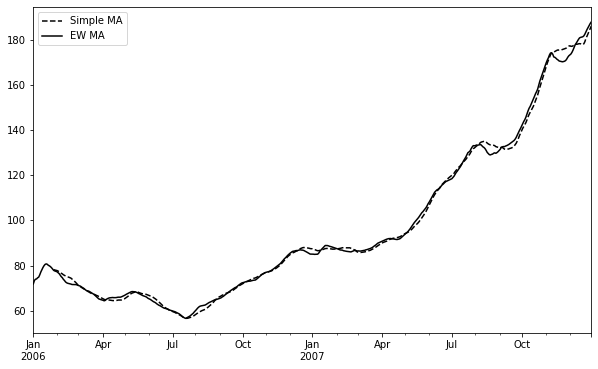

In [1238]:
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-',label='EW MA')
plt.legend()

In [1239]:
aapl_px[:4]

2006-01-02    71.89
2006-01-03    74.75
2006-01-04    74.97
2006-01-05    74.38
Freq: B, Name: AAPL, dtype: float64

In [1240]:
ma60[:4]

2006-01-02   NaN
2006-01-03   NaN
2006-01-04   NaN
2006-01-05   NaN
Freq: B, Name: AAPL, dtype: float64

In [1241]:
ewma60[:4]

2006-01-02    71.890000
2006-01-03    73.367667
2006-01-04    73.937767
2006-01-05    74.059619
Freq: B, Name: AAPL, dtype: float64

### 28. Binary Moving Window Functions

In [1246]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [1247]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

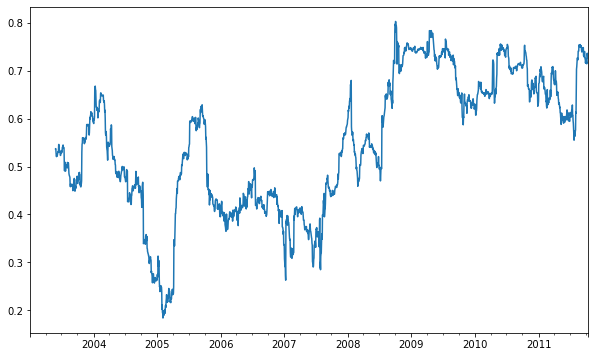

In [1244]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [1248]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

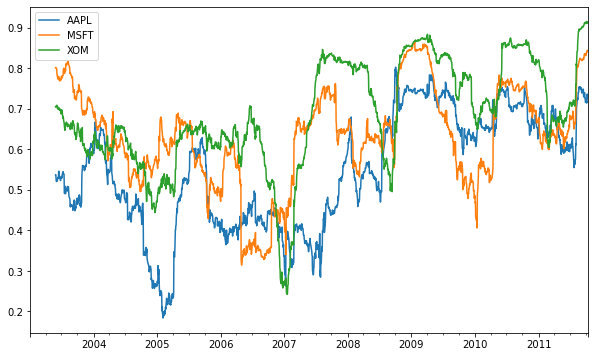

In [1249]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### 29. User-Defined Moving Window Functions

In [1250]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
returns.head()

,AAPL,MSFT,XOM
2003-01-02,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684
2003-01-06,0.000000,0.017975,0.024624
2003-01-07,-0.002685,0.019052,-0.033712
2003-01-08,-0.020188,-0.028272,-0.004145


In [1251]:
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.head()

2003-01-02   NaN
2003-01-03   NaN
2003-01-06   NaN
2003-01-07   NaN
2003-01-08   NaN
Freq: B, Name: AAPL, dtype: float64

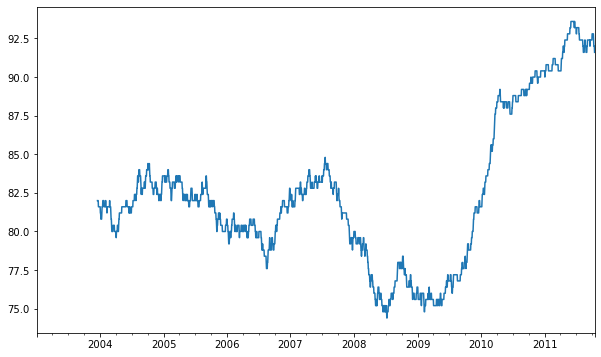

In [1252]:
result.plot()

In [1253]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS